In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import requests
import json
import petl as etl

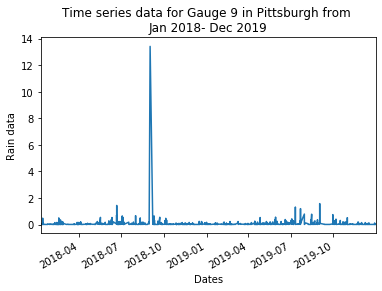

In [2]:
series = pd.read_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/hw2_data.txt', sep=',',header=0, index_col=0, parse_dates=True, squeeze=True)
series.columns=['Rain data','Waste']
series.index.names = ['Date']
series.plot(legend=False)
plt.xlabel('Dates')
plt.ylabel('Rain data')
plt.title('Time series data for Gauge 9 in Pittsburgh from \nJan 2018- Dec 2019')
plt.show()

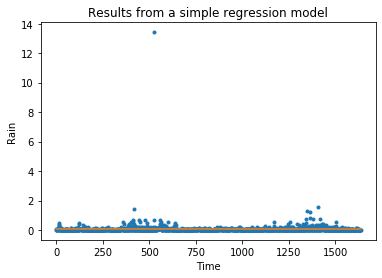

In [8]:
t0=0
tf=len(series)-1
t=np.linspace(t0,tf,len(series))
r=series['Rain data']
t2=sm.add_constant(t)
model2=sm.OLS(r,t2).fit()
pred2=model2.predict(t2)
plt.plot(t,r,'.')
plt.plot(t,pred2,'-')
#plt.ylim(0,1)
plt.xlabel('Time')
plt.ylabel('Rain')
plt.title('Results from a simple regression model')
plt.show()

In [5]:
t5=sm.add_constant(t)
y5=r.values
for i in range(100):
    model5=sm.OLS(y5,t5).fit()
    pred=model5.predict(t5)
    res=y5-pred   
    m=res.mean()
    sd=res.std()
    d_mean=np.abs(res-m)
    locs=np.where((d_mean>3*sd))
    X_cut=np.delete(t5,(*locs),axis=0)
    y_cut=np.delete(y5,(*locs),axis=0)   
    t5=X_cut
    y5=y_cut
    if len(locs[0])==0:
        print(f'Chauvenets criterion converges at {i}th iteration')
        break   

Chauvenets criterion converges at 10th iteration


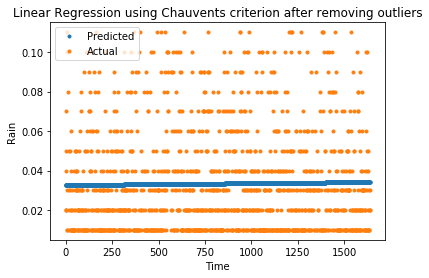

In [6]:
c=model5.params[0]
m=model5.params[1]
ypred=c+m*t
plt.plot(t,ypred,'.',label='Predicted')
plt.plot(X_cut[:,1],y_cut,'.',label='Actual')
plt.xlabel('Time')
plt.ylabel('Rain')
plt.title('Linear Regression using Chauvents criterion after removing outliers')
plt.legend()
plt.show()